In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [149]:
data = pd.read_csv('DATA/c13_9_2_prep.csv')
data.drop(['Unnamed: 0'], axis=1,inplace = True)
data.head()

,ACC,CAMP,LVL,AWARD,LOA,STAFF,PREVSTAFF,BALS,GAS,PAS,BLCKDSLS,RETURNS
0,392,0,3,751.14,101,21,22,46982,46982,2246,44736.0,0.0
1,393,0,2,416.42,101,18,19,26603,26603,1712,24891.0,-2435.0
2,394,0,3,618.44,101,17,16,38605,38605,1765,36840.0,0.0
3,395,0,5,1221.70,101,25,27,122660,122660,1823,72924.0,-155.0
4,396,0,3,662.57,101,11,11,41806,41806,2422,39384.0,-953.0


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886359 entries, 0 to 886358
Data columns (total 12 columns):
ACC          886359 non-null int64
CAMP         886359 non-null int64
LVL          886359 non-null int64
AWARD        886359 non-null float64
LOA          886359 non-null int64
STAFF        886359 non-null int64
PREVSTAFF    886359 non-null int64
BALS         886359 non-null int64
GAS          886359 non-null int64
PAS          886359 non-null int64
BLCKDSLS     886359 non-null float64
RETURNS      886359 non-null float64
dtypes: float64(3), int64(9)
memory usage: 81.1 MB


In [151]:
%%time
data2 = data.copy()
data2['prev_level'] = data2.groupby(['ACC'])['LVL'].shift()
data2['prev_level_diff'] = data2.groupby(['ACC'])['prev_level'].diff()
data2 = data2.dropna()
data2.head()

Wall time: 11 s


In [16]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [ ]:
def plot_difference()

In [23]:
%%time
mean_error = []
df_mean = pd.DataFrame(columns=['LVL_mean'])
for camp in range(3,13):
    train = data2[data2['CAMP'] < camp]
    val = data2[data2['CAMP'] == camp]
    
    p = val['prev_level'].values
    df_mean = df_mean.append({'LVL_mean': val['LVL'].values}, ignore_index=True)
    error = rmsle(val['LVL'].values, p)
    print('CAMP %d - Error %.5f' % (camp, error))
    mean_error.append(error)
    grouped = val['LVL'].groupby(val)
print('Mean Error = %.5f' % np.mean(mean_error))

CAMP 3 - Error 0.37869


ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [176]:
def plot_difference(df1, df2):
    import seaborn as sns
    grouped = camp_lvl.groupby(camp_lvl).count()
    grouped2 = camp_lvl2.groupby(camp_lvl2).count()
    result = pd.DataFrame(grouped)
    result2 = pd.DataFrame(grouped2)
    
    result.columns = ['count']
    result['lvl'] = result.index

    result2.columns = ['count']
    result2['lvl'] = result2.index

    f, ax = plt.subplots(figsize=(15, 9))
    sns.set(style="whitegrid")

    ax = sns.barplot(data=result)
    sns.set_color_codes("pastel")
    sns.barplot(x="lvl", y="count", data=result,
            label="Total", color="b")
    sns.set_color_codes("muted")
    sns.barplot(x="lvl", y="count", data=result2,
            label="Total", color="b")
    return 1

1

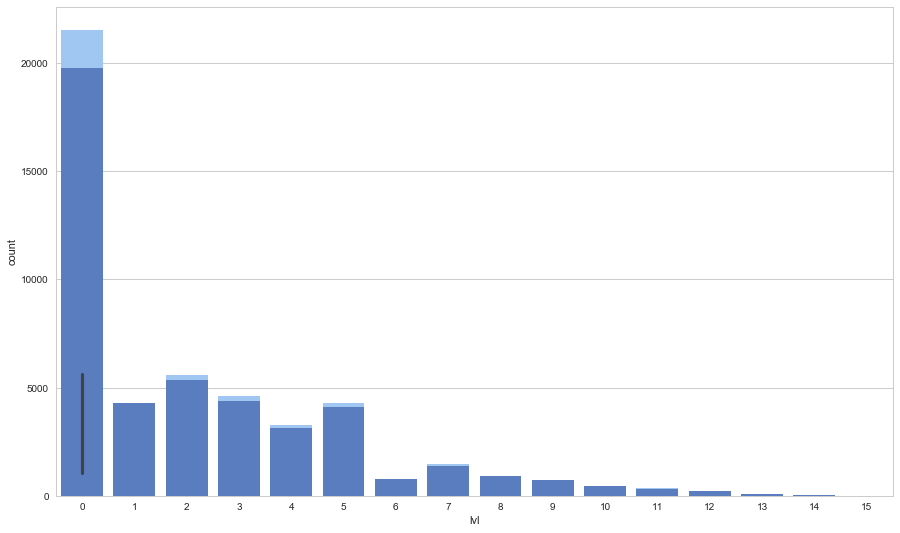

In [177]:
plot_difference(data2[data2['CAMP'] == 9].LVL, data2[data2['CAMP'] == 8].LVL)

In [160]:
camp_lvl = data2[data2['CAMP'] == 9].LVL
camp_lvl2 = data2[data2['CAMP'] == 8].LVL

In [161]:
grouped = camp_lvl.groupby(camp_lvl).count()
grouped2 = camp_lvl2.groupby(camp_lvl2).count()

In [162]:
result = pd.DataFrame(grouped)
result2 = pd.DataFrame(grouped2)

In [163]:
result.columns = ['count']
result['lvl'] = result.index

result2.columns = ['count']
result2['lvl'] = result2.index

In [164]:
'''result = result.T'''

'result = result.T'

In [165]:
result2.head(5)

,count,lvl
LVL,,
0,19766,0
1,4277,1
2,5359,2
3,4385,3
4,3153,4


In [166]:
grouped2

LVL
0     19766
1      4277
2      5359
3      4385
4      3153
5      4090
6       792
7      1369
8       900
9       749
10      451
11      331
12      212
13       66
14       15
15        6
Name: LVL, dtype: int64

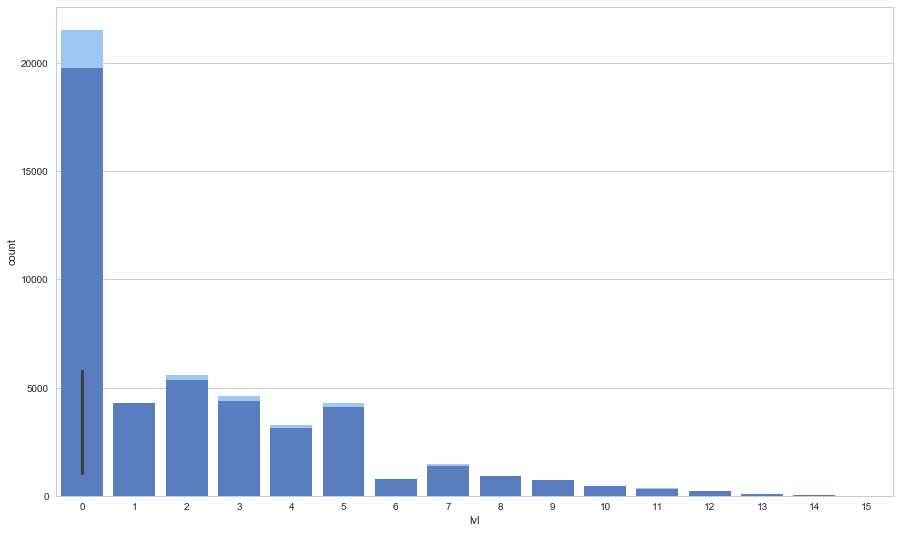

In [172]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 9))
sns.set(style="whitegrid")

ax = sns.barplot(data=result)
sns.set_color_codes("pastel")
sns.barplot(x="lvl", y="count", data=result,
            label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x="lvl", y="count", data=result2,
            label="Total", color="b")

In [103]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


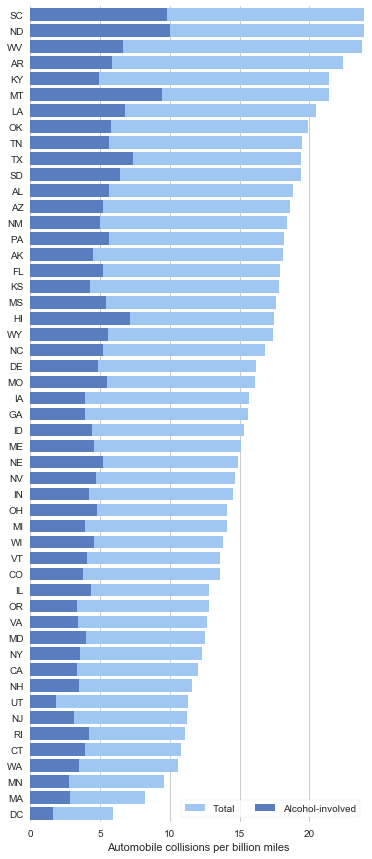

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [32]:
type(camp_lvl)

pandas.core.series.Series

In [18]:
tuple(df_mean.values[9][0])

(3,
 3,
 5,
 5,
 0,
 10,
 4,
 2,
 4,
 4,
 4,
 5,
 5,
 3,
 2,
 5,
 8,
 5,
 1,
 6,
 6,
 0,
 9,
 3,
 3,
 5,
 4,
 3,
 7,
 7,
 7,
 4,
 4,
 4,
 3,
 2,
 4,
 3,
 3,
 3,
 9,
 3,
 4,
 7,
 2,
 0,
 7,
 2,
 2,
 4,
 5,
 4,
 3,
 2,
 5,
 3,
 4,
 2,
 5,
 3,
 0,
 2,
 0,
 4,
 4,
 9,
 8,
 8,
 4,
 4,
 3,
 1,
 2,
 1,
 3,
 0,
 7,
 2,
 15,
 0,
 11,
 2,
 7,
 7,
 2,
 0,
 3,
 3,
 8,
 7,
 0,
 3,
 5,
 3,
 5,
 0,
 1,
 3,
 5,
 2,
 7,
 5,
 5,
 3,
 2,
 4,
 5,
 2,
 4,
 0,
 3,
 5,
 7,
 3,
 5,
 7,
 8,
 3,
 3,
 3,
 3,
 8,
 5,
 2,
 1,
 5,
 2,
 2,
 7,
 3,
 8,
 9,
 9,
 10,
 8,
 1,
 3,
 5,
 4,
 3,
 1,
 3,
 8,
 5,
 3,
 3,
 3,
 6,
 2,
 1,
 5,
 3,
 4,
 2,
 7,
 3,
 3,
 2,
 7,
 0,
 2,
 3,
 3,
 2,
 2,
 5,
 6,
 3,
 2,
 5,
 2,
 7,
 7,
 3,
 3,
 6,
 5,
 2,
 2,
 0,
 8,
 2,
 1,
 7,
 2,
 3,
 5,
 7,
 0,
 2,
 6,
 3,
 3,
 0,
 3,
 7,
 0,
 5,
 7,
 0,
 0,
 3,
 3,
 11,
 8,
 8,
 6,
 3,
 8,
 2,
 7,
 7,
 0,
 5,
 4,
 4,
 3,
 2,
 0,
 2,
 8,
 4,
 2,
 2,
 5,
 2,
 0,
 4,
 5,
 4,
 5,
 2,
 3,
 2,
 5,
 3,
 2,
 2,
 4,
 3,
 4,
 2,
 2,
 7,
 0,
 4,
 2,
 0,
 5,

In [19]:
mean_cmap = tuple(df_mean.values[9][0])

In [44]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


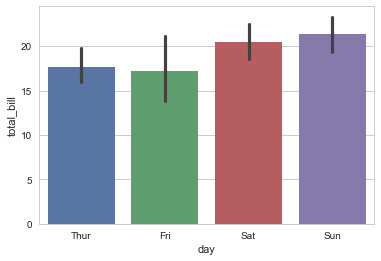

In [47]:
plt.show()

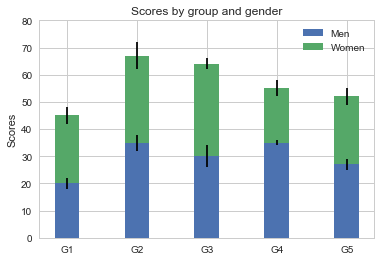

In [23]:

N = 9
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [20]:
ax = sns.barplot(x="", y="LVL_mean", data=df_mean)

ValueError: Could not interpret input ''

In [5]:
%%time
mean_error = []
for camp in range(3,16):
    train = data2[data2['CAMP'] < camp]
    val = data2[data2['CAMP'] == camp]
    
    xtr, xts = train.drop(['LVL'], axis=1), val.drop(['LVL'], axis=1)
    ytr, yts = train['LVL'].values, val['LVL'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (camp, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

NameError: name 'data2' is not defined

In [10]:
%%time
mean_error = []
for camp in range(3,16):
    train = data2[data2['CAMP'] < camp]
    val = data2[data2['CAMP'] == camp]
    
    xtr, xts = train.drop(['LVL'], axis=1), val.drop(['LVL'], axis=1)
    ytr, yts = train['LVL'].values, val['LVL'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (camp, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 3 - Error 0.03820
Week 4 - Error 0.02839
Week 5 - Error 0.02969
Week 6 - Error 0.03794
Week 7 - Error 0.02899
Week 8 - Error 0.02208
Week 9 - Error 0.01882
Week 10 - Error 0.03198
Week 11 - Error 0.02326
Week 12 - Error 0.01815
Week 13 - Error 0.01684
Week 14 - Error 0.02065
Week 15 - Error 0.02343
Mean Error = 0.02603
Wall time: 59min 57s


In [1]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")


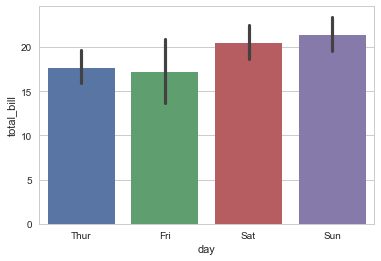

In [2]:
ax = sns.barplot(x="day", y="total_bill", data=tips)